<br><br><br><br><br>

# The Scientific Python Ecosystem

<br><br><br><br><br>

<img src="img/shells-1.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<br><br>

<p style="font-size: 100px"><img src="img/numerical-recipes.jpg" width="25%" style="vertical-align: middle"> = <img src="img/scipy-logo.png" width="45%" style="vertical-align: middle"></p>

<br><br>

<center><img src="img/scipy-docs.png" width="65%"></center>

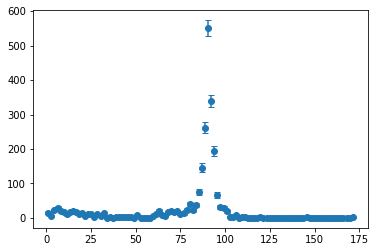

In [6]:
import uproot, numpy, matplotlib.pyplot
masses = uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"].array("M")

y, edges = numpy.histogram(masses, bins=100)
yerr = numpy.sqrt(y)

# the middle of each bin
x = (edges[1:] + edges[:-1])/2

matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

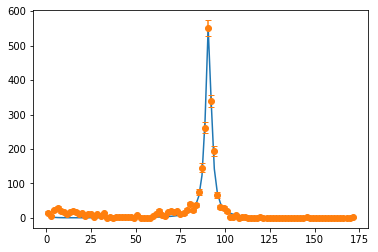

In [7]:
import scipy.stats      # for functions like "cauchy"
import scipy.optimize   # for optimizations like "curve_fit"

f = lambda x, a, b, c, d: a*scipy.stats.cauchy.pdf(x, b, c) + d/x**2

# fit f to x, y, yerr, excluding points where y and yerr are zero
parameters, errors = scipy.optimize.curve_fit(f, x[y > 0], y[y > 0], sigma=yerr[y > 0])

matplotlib.pyplot.plot(x, f(x, *parameters))
matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

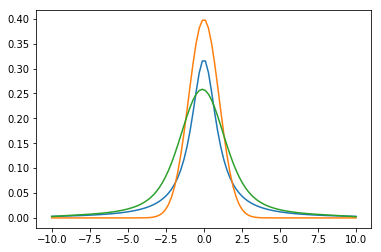

In [24]:
xs = numpy.linspace(-10, 10, 100)

# Exercise: search through the SciPy docs and figure out how to convolve two functions.
lorentzian = scipy.stats.cauchy.pdf(xs)
gaussian   = scipy.stats.norm.pdf(xs)
voigtian   = ???

matplotlib.pyplot.plot(xs, lorentzian);
matplotlib.pyplot.plot(xs, gaussian);
matplotlib.pyplot.plot(xs, voigtian);

<img src="img/pyminuit.png" width="100%">

<center><img src="img/iminuit.png" width="90%"></center>

<br><br><br>

<center><img src="img/scikit-learn-logo.png" width="40%"></center>

<br><br><br>

<img src="img/scikit-learn-estimators.png" width="95%">

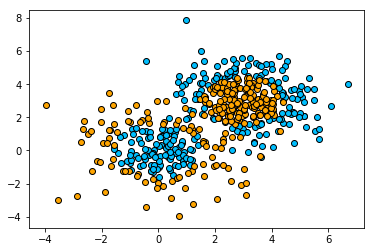

In [56]:
import sklearn.datasets
X1, y1 = sklearn.datasets.make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1)
X2, y2 = sklearn.datasets.make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1)
X = numpy.concatenate((X1, X2))
y = numpy.concatenate((y1, -y2 + 1))

# These points represent a hard classification problem.
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black");

In [72]:
import sklearn.ensemble
import sklearn.tree

# Solution? Boosted decision tree!
bdt = sklearn.ensemble.AdaBoostClassifier(
    sklearn.tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
bdt.fit(X, y)

print("\n\npredictions:\n", bdt.predict(X))
print("\n\ntruth:\n", y)



predictions:
 [0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 

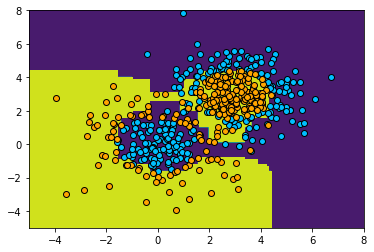

In [71]:
xx, yy = numpy.meshgrid(numpy.arange(-5, 8, 0.02), numpy.arange(-5, 8, 0.02))
Z = bdt.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# The decision boundary is a close fit to the points.
matplotlib.pyplot.contourf(xx, yy, Z);
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(-5, 8);
matplotlib.pyplot.ylim(-5, 8);

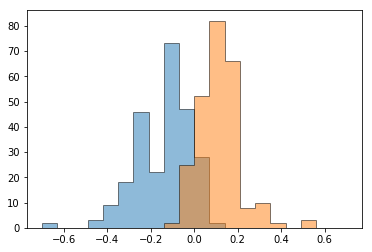

In [70]:
twoclass_output = bdt.decision_function(X)

# Decision scores clearly separate the two populations.
matplotlib.pyplot.hist(twoclass_output[y == 0], bins=20, range=(-0.7, 0.7),
                       alpha=0.5, histtype="stepfilled", edgecolor="black");
matplotlib.pyplot.hist(twoclass_output[y == 1], bins=20, range=(-0.7, 0.7),
                       alpha=0.5, histtype="stepfilled", edgecolor="black");